Tarea 2: Ignacio Jiménez Araus

Desarrollo en orden las preguntas desde aquí

# Pregunta 1a


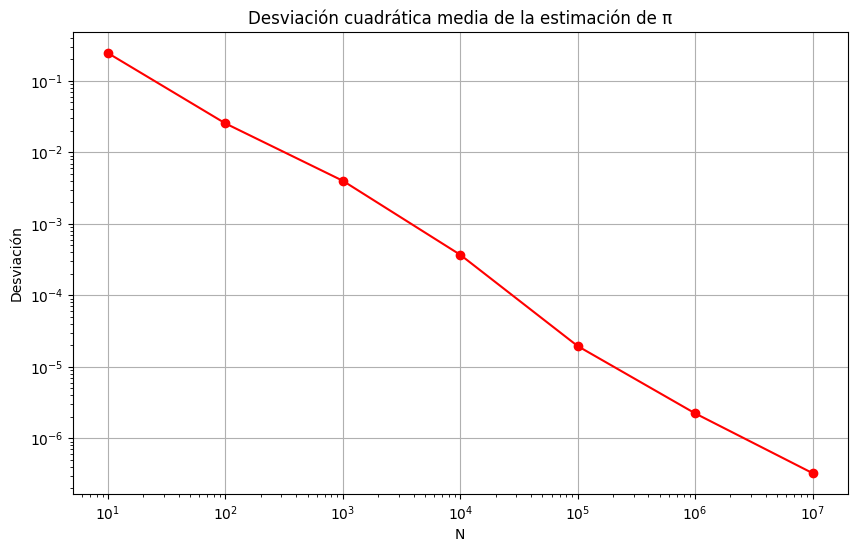

In [3]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

#direct-pi
def estimate_pi(N):
    n_hits = 0
    for _ in range(N):
        x, y = uniform(-1.0, 1.0), uniform(-1.0, 1.0)
        if x**2 + y**2 < 1.0:
            n_hits += 1
    return 4.0 * n_hits / N

#N
N_values = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
n_trials = 20

pi_estimates = np.zeros((len(N_values), n_trials))
deviations = []

for i, N in enumerate(N_values):
    for j in range(n_trials):
        pi_estimates[i, j] = estimate_pi(N)
    mean_pi = np.mean(pi_estimates[i])
    deviation = np.mean((pi_estimates[i] - np.pi)**2)
    deviations.append(deviation)

# Graficos
plt.figure(figsize=(10, 6))
plt.loglog(N_values, deviations, marker='o', color='r')
plt.title("Desviación cuadrática media de la estimación de π")
plt.xlabel("N")
plt.ylabel("Desviación")
plt.grid(True)
plt.show()


La desviación cuadrática media disminuye de forma lineal al aumentar el número N, mejorando la precisión en la obtención de Pi.

# Pregunta 1b

Escogiendo N=10000 y delta=0.3, se obtiene: 0.778 el cual es cercano al valor real.


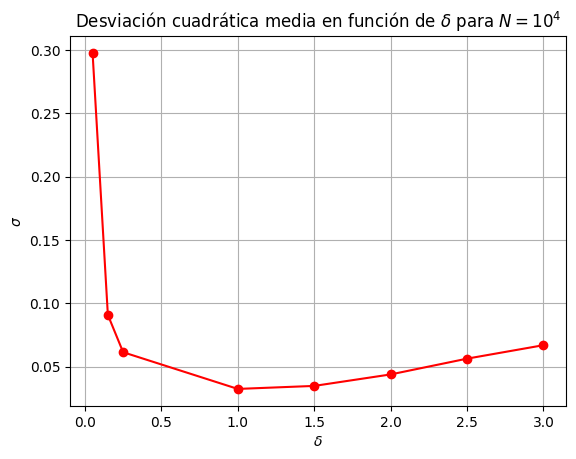

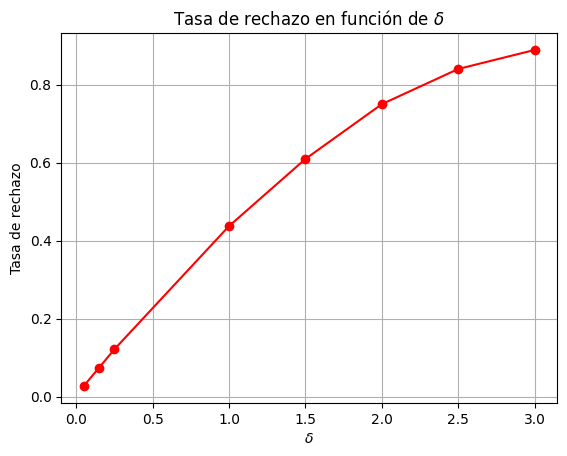

In [4]:
import random, math, pylab
import numpy as np

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    n_rejected = 0  # Contador de rechazos
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        else:
            n_rejected += 1
        if x**2 + y**2 < 1.0:
            n_hits += 1
    rejection_rate = n_rejected / N  # Tasa de rechazo
    return n_hits, rejection_rate

#test de pi
p= markov_pi(10000,0.3)[0]/10000
print("Escogiendo N=10000 y delta=0.3, se obtiene:", float(p),  "el cual es cercano al valor real.")

# Parámetros de simulación
N = 10000  # Número fijo de pasos
n_runs = 500  # Número de repeticiones para calcular sigma
deltas = [0.05, 0.15, 0.25, 1, 1.5, 2, 2.5, 3]  # Valores de delta
sigmas = []  # Para almacenar las desviaciones cuadráticas
rejection_rates = []  # Para almacenar las tasas de rechazo

# Iterar sobre diferentes valores de delta
for delta in deltas:
    sigma = 0.0
    rejection_sum = 0.0

    # Ejecutar n_runs simulaciones para cada delta
    for run in range(n_runs):
        n_hits, rejection_rate = markov_pi(N, delta)
        pi_est = 4.0 * n_hits / float(N)
        sigma += (pi_est - math.pi) ** 2
        rejection_sum += rejection_rate

    # Desviación cuadrática media para este delta
    sigmas.append(math.sqrt(sigma / n_runs))
    rejection_rates.append(rejection_sum / n_runs)  # Tasa de rechazo promedio

# Graficar la desviación cuadrática media en función de delta
pylab.figure()
pylab.plot(deltas, sigmas, 'o-', color='r')
pylab.xlabel('$\delta$')
pylab.ylabel('$\sigma$')
pylab.title('Desviación cuadrática media en función de $\delta$ para $N=10^4$')
pylab.grid(True)
pylab.show()

# Graficar la tasa de rechazo en función de delta
pylab.figure()
pylab.plot(deltas, rejection_rates, 'o-', color='r')
pylab.xlabel('$\delta$')
pylab.ylabel('Tasa de rechazo')
pylab.title('Tasa de rechazo en función de $\delta$')
pylab.grid(True)
pylab.show()


Según el primer gráfico para delta=1 se obtiene la menor desviación, por ende la tasa de rechazo es de aproximadamente de 0.4 a 0.4

# Pregunta 2a


In [5]:
import numpy as np

class Gray:
    def __init__(self, N, tau=None):
        self.N = N
        self.tau = list(range(1, N+2)) if tau is None else tau

    def __iter__(self):
        return self

    def __next__(self):
        k = self.tau[0]
        if k > self.N:
            raise StopIteration
        self.tau[k-1] = self.tau[k]
        self.tau[k] = k+1
        if k != 1:
            self.tau[0] = 1
        return k

    def __str__(self):
        return f'[{",".join(str(t) for t in self.tau)}]'

def test_gray_flip(N):
    spins = np.ones(N, dtype=int)
    gray = Gray(N)
    print(f"Probando Gray flip N={N}:")
    for k in gray:
        print(spins)
        spins[k - 1] *= -1  # Flip del espín correspondiente

test_gray_flip(4)  # Prueba con N=4


Probando Gray flip N=4:
[1 1 1 1]
[-1  1  1  1]
[-1 -1  1  1]
[ 1 -1  1  1]
[ 1 -1 -1  1]
[-1 -1 -1  1]
[-1  1 -1  1]
[ 1  1 -1  1]
[ 1  1 -1 -1]
[-1  1 -1 -1]
[-1 -1 -1 -1]
[ 1 -1 -1 -1]
[ 1 -1  1 -1]
[-1 -1  1 -1]
[-1  1  1 -1]


Aquí hago sólo lo del test en la parte b hago todo el resto

# Pregunta 2b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Gray:
    def __init__(self, N, tau=None):
        self.N = N
        self.tau = list(range(1, N+2)) if tau is None else tau

    def __iter__(self):
        return self

    def __next__(self):
        k = self.tau[0]
        if k > self.N:
            raise StopIteration
        self.tau[k-1] = self.tau[k]
        self.tau[k] = k+1
        if k != 1:
            self.tau[0] = 1
        return k

def energy(spins, J=1):
    N = spins.shape[0]  # Asumimos que spins es una matriz cuadrada de NxN
    # Sumamos las interacciones con los vecinos horizontales (derecha) y verticales (abajo)
    E_horiz = np.sum(spins * np.roll(spins, -1, axis=1))  # Vecinos a la derecha (condiciones periódicas)
    E_vert = np.sum(spins * np.roll(spins, -1, axis=0))   # Vecinos abajo (condiciones periódicas)

    # Energía total (se multiplica por -J)
    E = -J * (E_horiz + E_vert)

    return E

def magnetization(spins):
    return np.sum(spins)

def gray_flip_enumeration(N):
    # Genera todos los números en código Gray
    gray_codes = np.arange(2**N) ^ (np.arange(2**N) >> 1)  # Genera los códigos Gray
    # Convierte cada número de código Gray a un arreglo binario de 1's y -1's (spins)
    configurations = ((gray_codes[:, None] >> np.arange(N)[::-1]) & 1) * 2 - 1  # De 0 y 1 a -1 y 1
    return configurations


import numpy as np

def generate_histogram(N):
    num_spins = N**2
    # Generamos todas las configuraciones posibles con el código Gray
    gray_codes = np.arange(2**num_spins) ^ (np.arange(2**num_spins) >> 1)  # Genera los códigos Gray
    configurations = ((gray_codes[:, None] >> np.arange(num_spins)[::-1]) & 1) * 2 - 1  # De 0 y 1 a -1 y 1
    configurations = configurations.reshape(-1, N, N)  # Convertimos a matrices NxN

    # Calcular energía y magnetización para todas las configuraciones
    energies = np.array([energy(config) for config in configurations])
    magnetizations = np.sum(configurations, axis=(1, 2))  # Suma todos los spins para obtener M

    # Crear el histograma N(E, M)
    unique_pairs, counts = np.unique(np.column_stack((energies, magnetizations)), axis=0, return_counts=True)
    histogram = {tuple(pair): count for pair, count in zip(unique_pairs, counts)}

    return histogram



def probability_distribution(histogram, T, N):
    beta = 1 / T  # Suponemos k_B = 1

    # Extraer energías (E), magnetizaciones (M) y los conteos (counts) del histograma
    keys = np.array(list(histogram.keys()))  # Array de pares (E, M)
    E = keys[:, 0]
    M = keys[:, 1]
    counts = np.array(list(histogram.values()))

    # Calcular la función de partición Z de forma vectorizada
    Z = np.sum(counts * np.exp(-beta * E))

    # Calcular las probabilidades de cada magnetización M
    probs = counts * np.exp(-beta * E) / Z

    # Sumar las probabilidades para el mismo M
    unique_M, indices = np.unique(M, return_inverse=True)
    probs_M = np.bincount(indices, weights=probs)

    # Convertir las magnetizaciones a m = M / N y normalizar
    probs_m = {M_val / N: prob for M_val, prob in zip(unique_M, probs_M)}

    return probs_m

def binder_cumulant(histogram, T, N):
    '''Calcula el Binder cumulant B(T) para una temperatura dada de forma vectorizada.'''
    beta = 1 / T

    # Extraer energías (E), magnetizaciones (M) y los conteos (counts) del histograma
    keys = np.array(list(histogram.keys()))
    E = keys[:, 0]
    M = keys[:, 1]
    counts = np.array(list(histogram.values()))

    # Convertir las magnetizaciones a m = M / N
    m = M / N

    weights = counts * np.exp(-beta * E)


    Z = np.sum(weights)
    m2 = np.sum(weights * m**2) / Z
    m4 = np.sum(weights * m**4) / Z

    B = (1/2) * (3 - m4 / m2**2)

    return B

def plot_distribution_comparison(histogram, N, T_values):
    plt.figure(figsize=(8, 6))
    for T in T_values:
        probs_m = probability_distribution(histogram, T, N)
        plt.plot(list(probs_m.keys()), list(probs_m.values()), label=f'T = {T}')

    plt.xlabel("Magnetización por spin m")
    plt.ylabel("πM")
    plt.title(f"Distribución de probabilidad πM para N={N}")
    plt.legend()
    plt.show()

def plot_binder_comparison(T_range, N_values):
    plt.figure(figsize=(8, 6))
    for N in N_values:
        histogram = generate_histogram(N)
        B_values = [binder_cumulant(histogram, T, N) for T in T_range]
        plt.plot(T_range, B_values, label=f'N = {N}')

    plt.xlabel("Temperatura T")
    plt.ylabel("Binder cumulant B(T)")
    plt.title("Binder cumulant B(T) para diferentes tamaños de red N")
    plt.axvline(x=2.269, color='r', linestyle='--', label='T = 2.269')
    plt.legend()
    plt.show()

N = 4  # Tamaño de la red NxN
T_values = [2, 5]  # Temperaturas a comparar

# Generar el histograma de configuraciones N(E,M) para N=4
histogram = generate_histogram(N)

# Graficar la distribución de probabilidad πM para T=2 y T=5 en el mismo gráfico
plot_distribution_comparison(histogram, N, T_values)

# Graficar el Binder cumulant para N=2 y N=4 en el mismo gráfico
T_range = np.linspace(0.1, 4, 100)
plot_binder_comparison(T_range, [2,3,4])

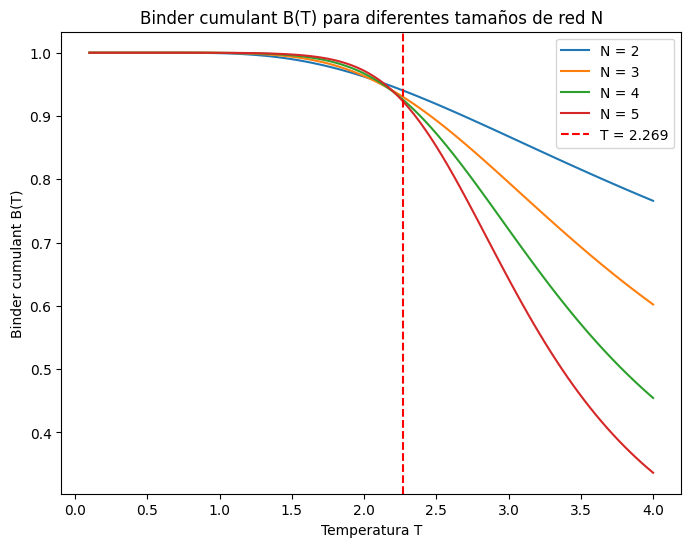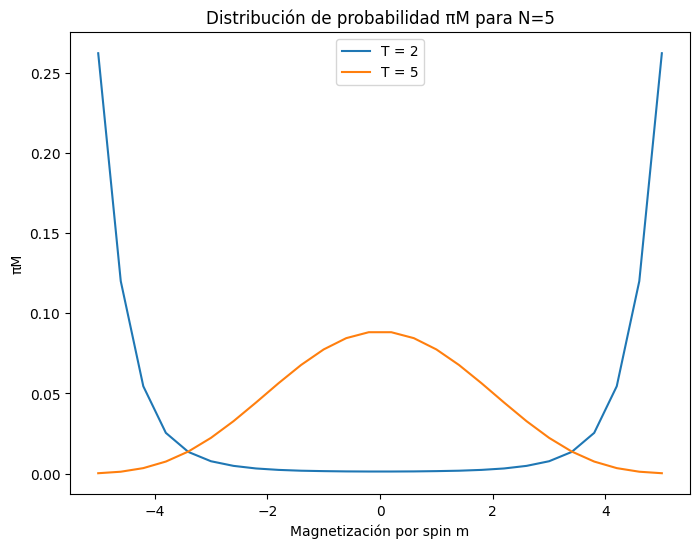

No me corre para N=6 así que añadí N=3 y N=5 para verlo mejor.

Vemos que hay una distribución bimodal de la probabilidad de magnetización por spin, antes de la temperatura crítica parece haber una magenitzación en los extremos, pero después de la temperatura esto cambia a una forma simpétrica.


Por otro lado, el binder cumulant pareciera ser que a medida de que aumentamos el número de N la intersección va siendo cada vez más cerca del valor teórico de la temperatura crítica Tc.

# Pregunta 3 Parte 1


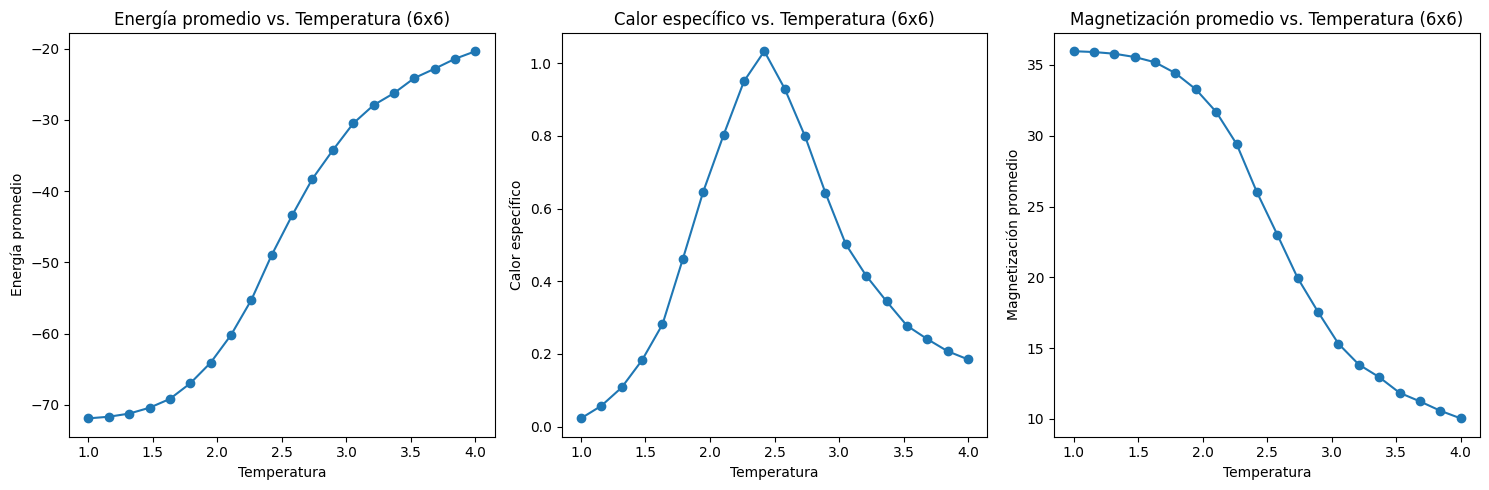

In [7]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
L = 6  # Tamaño de la red LxL (en este caso, 6x6)
N = L * L  # Número total de espines
nsteps = 10**6  # Número de pasos de Monte Carlo
n_eq_steps = 10**6  # Número de pasos para alcanzar el equilibrio

# Función para crear los vecinos con condiciones de borde periódicas
def create_neighbors(L):
    N = L * L
    return {i: ((i // L) * L + (i + 1) % L, (i + L) % N,
                (i // L) * L + (i - 1) % L, (i - L) % N) \
            for i in range(N)}

# Función para calcular la energía de una configuración
def energy(S, nbr):
    E = 0
    for i in range(N):
        E -= S[i] * sum(S[nn] for nn in nbr[i])
    return E / 2  # Dividimos por 2 porque las interacciones se cuentan dos veces

# Algoritmo de Metropolis para el modelo de Ising
def metropolis(S, T, nbr, nsteps, n_eq_steps):
    beta = 1.0 / T
    energies = []
    magnetizations = []

    # Fase de equilibrio
    for step in range(n_eq_steps):
        k = random.randint(0, N - 1)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1

    # Fase de medición
    for step in range(nsteps):
        k = random.randint(0, N - 1)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1

        # Registrar energía y magnetización después de alcanzar el equilibrio
        if step % 100 == 0:  # Recolectar datos cada 100 pasos
            E = energy(S, nbr)
            M = sum(S)
            energies.append(E)
            magnetizations.append(M)

    return np.array(energies), np.array(magnetizations)

# Cálculo del calor específico
def specific_heat(energies, T):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(energies ** 2)
    C = (mean_E2 - mean_E ** 2) / (T ** 2 * N)
    return C

# Simulación en función de la temperatura para la red 6x6
temperatures = np.linspace(1.0, 4.0, 20)  # Rango de temperaturas
mean_energies = []
mean_magnetizations = []
specific_heats = []

S = [random.choice([1, -1]) for _ in range(N)]  # Configuración inicial de espines
nbr = create_neighbors(L)  # Crear vecinos para condiciones periódicas

for T in temperatures:
    energies, magnetizations = metropolis(S, T, nbr, nsteps, n_eq_steps)
    mean_energies.append(np.mean(energies))
    mean_magnetizations.append(np.mean(np.abs(magnetizations)))
    specific_heats.append(specific_heat(energies, T))

# Graficar la energía promedio, calor específico y magnetización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(temperatures, mean_energies, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Energía promedio")
plt.title("Energía promedio vs. Temperatura (6x6)")

plt.subplot(1, 3, 2)
plt.plot(temperatures, specific_heats, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Calor específico")
plt.title("Calor específico vs. Temperatura (6x6)")

plt.subplot(1, 3, 3)
plt.plot(temperatures, mean_magnetizations, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Magnetización promedio")
plt.title("Magnetización promedio vs. Temperatura (6x6)")

plt.tight_layout()
plt.show()

print("El calor específico es para T=2 es: ", specific_heat(energies, 2)) #Entrega C=0.7432 para T=2, un 8% diferente conmparado al valor teórico

Aquí se obtienen todos los parámetros para una red de 6x6, se nota que C=0.7432 para T=2

# Pregunta 3 Parte 2


In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Función para crear los vecinos con condiciones de borde periódicas
def create_neighbors(L):
    N = L * L
    nbr = {}
    for i in range(N):
        # Vecinos con condiciones de borde periódicas
        nbr[i] = [(i // L) * L + (i + 1) % L,  # Derecha
                  (i + L) % N,                 # Abajo
                  (i // L) * L + (i - 1) % L,  # Izquierda
                  (i - L) % N]                 # Arriba
    return nbr

# Función para calcular la energía de una configuración
def energy(S, nbr):
    '''Calcula la energía de la configuración de espines usando numpy.'''
    E = -np.sum([S[i] * sum(S[nn] for nn in nbr[i]) for i in range(len(S))]) / 2  # Evitar doble conteo
    return E

# Algoritmo de Metropolis para el modelo de Ising
def metropolis(S, T, nbr, nsteps, n_eq_steps):
    beta = 1.0 / T
    energies = []
    magnetizations = []

    N = len(S)  # El tamaño de la red

    # Fase de equilibrio
    for step in range(n_eq_steps):
        k = np.random.randint(0, N)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])

        # Aplicar el criterio de Metropolis
        if random.uniform(0.0, 1.0) < np.exp(-beta * delta_E):
            S[k] *= -1

    # Fase de medición
    for step in range(nsteps):
        k = np.random.randint(0, N)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])

        # Aplicar el criterio de Metropolis
        if random.uniform(0.0, 1.0) < np.exp(-beta * delta_E):
            S[k] *= -1

        # Registrar energía y magnetización después de alcanzar el equilibrio
        if step % 100 == 0:  # Recolectar datos cada 100 pasos
            E = energy(S, nbr)
            M = np.sum(S)
            energies.append(E)
            magnetizations.append(M)

    return np.array(energies), np.array(magnetizations)

# Parámetros de la simulación
nsteps = 500000  # Número de pasos de Monte Carlo
n_eq_steps = 500000  # Número de pasos para alcanzar el equilibrio
temperatures = np.linspace(1.0, 4.0, 20)  # Rango de temperaturas

# Tamaños de red a simular
L_values = [4, 8, 16,32]  # Redes
mean_magnetizations_all = {}

# Simular para cada tamaño de red
for L in L_values:
    N = L * L
    S = np.random.choice([1, -1], size=N)  # Configuración inicial de espines usando numpy
    nbr = create_neighbors(L)  # Crear vecinos para condiciones periódicas

    mean_magnetizations = []
    for T in temperatures:
        energies, magnetizations = metropolis(S, T, nbr, nsteps, n_eq_steps)
        mean_magnetizations.append(np.mean(np.abs(magnetizations)))

    # Normalizar las magnetizaciones al máximo valor para que el máximo sea 1
    max_magnetization = max(mean_magnetizations)
    mean_magnetizations_all[L] = [m / max_magnetization for m in mean_magnetizations]

# Graficar la magnetización promedio (normalizada) para diferentes tamaños de red
plt.figure(figsize=(8, 6))
for L in L_values:
    plt.plot(temperatures, mean_magnetizations_all[L], '-o', label=f'{L}x{L}')

plt.xlabel("Temperatura")
plt.ylabel("Magnetización promedio (normalizada)")
plt.title("Magnetización promedio (normalizada) vs. Temperatura para diferentes tamaños de red")
plt.legend()
plt.grid(True)
plt.show()

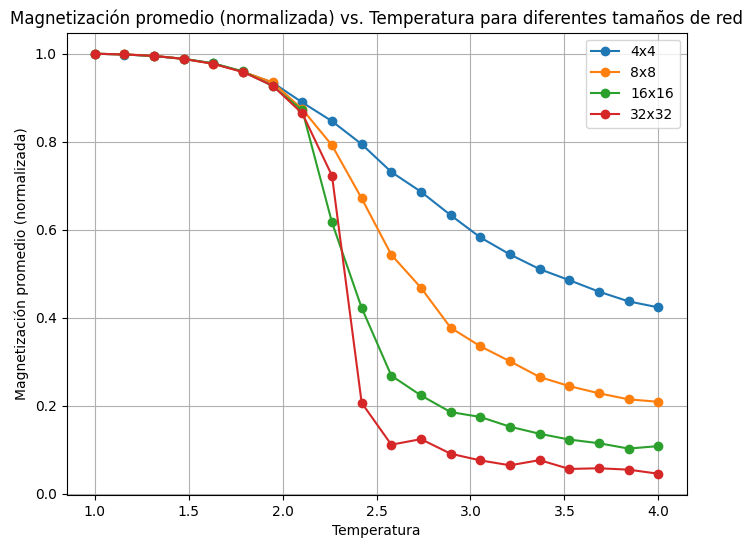

# Pregunta 4 Parte 1


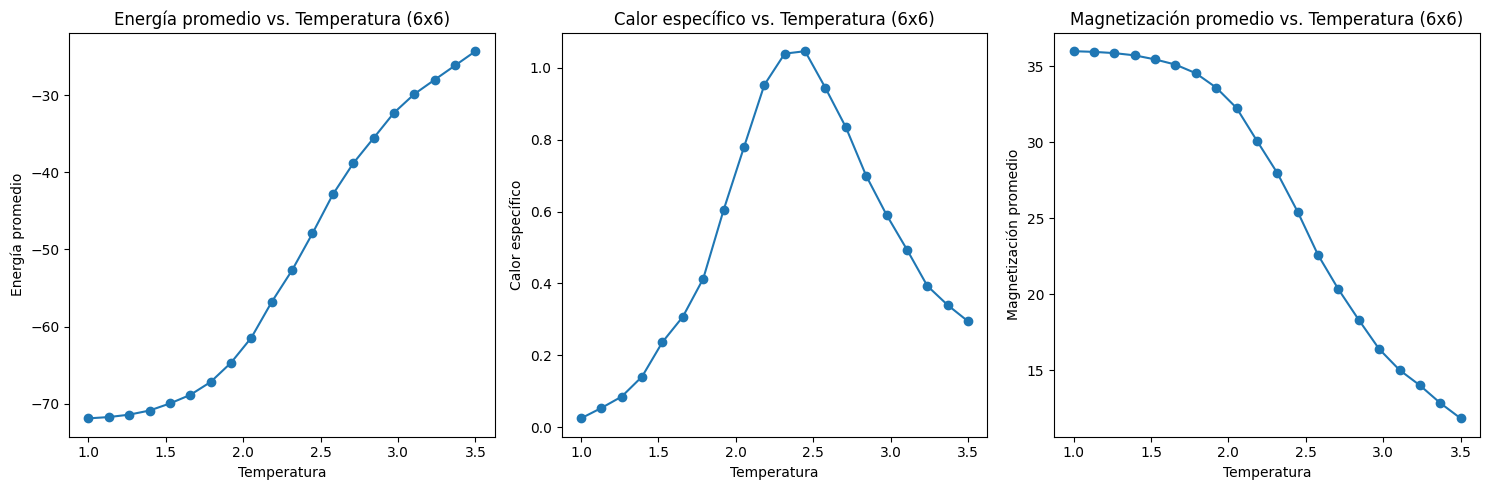

El calor específico para T=2 es:  0.8206673377777823


In [8]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
L = 6  # Tamaño de la red 6x6
N = L * L  # Número total de espines
T_values = np.linspace(1.0, 3.5, 20)  # Rango de temperaturas
nsteps = 10000  # Número de pasos de Monte Carlo para cada temperatura

# Función para crear los vecinos con condiciones de borde periódicas
def create_neighbors(L):
    N = L * L
    return {i: ((i // L) * L + (i + 1) % L,  # Vecino derecha
                (i + L) % N,                # Vecino abajo
                (i // L) * L + (i - 1) % L,  # Vecino izquierda
                (i - L) % N)                # Vecino arriba
            for i in range(N)}

# Función para calcular la energía de la configuración
def energy(S, nbr):
    '''Calcula la energía de la configuración de espines'''
    E = -sum(S[i] * sum(S[nn] for nn in nbr[i]) for i in range(len(S))) / 2  # Evitar doble conteo
    return E

# Algoritmo de Wolff para generar clusters
def wolff_step(S, T, nbr):
    p = 1.0 - math.exp(-2.0 / T)  # Probabilidad de agregar espines al cluster
    k = random.randint(0, N - 1)  # Elegir un espín aleatorio
    Pocket, Cluster = [k], [k]    # Crear el cluster inicial

    # Creación del cluster
    while Pocket:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        Pocket.remove(j)

    # Voltear todos los espines en el cluster
    for j in Cluster:
        S[j] *= -1

# Cálculo del calor específico
def specific_heat(energies, T):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(energies ** 2)
    C = (mean_E2 - mean_E ** 2) / (T ** 2 * N)
    return C

# Simulación del algoritmo de Wolff para diferentes temperaturas
nbr = create_neighbors(L)  # Crear la lista de vecinos para condiciones periódicas
mean_energies = []
specific_heats = []
mean_magnetizations = []
all_energies = []  # Lista para almacenar todas las energías

for T in T_values:
    S = [random.choice([1, -1]) for _ in range(N)]  # Configuración inicial de espines aleatorios
    energies = []
    magnetizations = []

    # Ejecutar los pasos de Monte Carlo
    for step in range(nsteps):
        wolff_step(S, T, nbr)

        # Calcular energía y magnetización después de cada paso
        E = energy(S, nbr)
        M = np.sum(S)

        energies.append(E)
        magnetizations.append(abs(M))  # Tomamos el valor absoluto de la magnetización

    # Almacenar las energías de la simulación actual
    all_energies.append(energies)

    # Promediar las energías y magnetizaciones
    mean_energies.append(np.mean(energies))
    specific_heats.append(specific_heat(np.array(energies), T))
    mean_magnetizations.append(np.mean(magnetizations))

# Graficar la energía promedio, calor específico y magnetización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(T_values, mean_energies, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Energía promedio")
plt.title("Energía promedio vs. Temperatura (6x6)")

plt.subplot(1, 3, 2)
plt.plot(T_values, specific_heats, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Calor específico")
plt.title("Calor específico vs. Temperatura (6x6)")

plt.subplot(1, 3, 3)
plt.plot(T_values, mean_magnetizations, '-o')
plt.xlabel("Temperatura")
plt.ylabel("Magnetización promedio")
plt.title("Magnetización promedio vs. Temperatura (6x6)")

plt.tight_layout()
plt.show()

# Calor específico para T = 2 (usamos las energías individuales correspondientes)
index_T2 = np.argmin(np.abs(T_values - 2))  # Encontrar el índice de la temperatura más cercana a T=2
calor_especifico_T2 = specific_heat(np.array(all_energies[index_T2]), 2)

print("El calor específico para T=2 es: ", calor_especifico_T2) #Se obtiene C=0.7745 con un 13% de error.

# Pregunta 4 Parte 2

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Algoritmo de Wolff para generar clusters
def wolff_step(S, T, nbr, L):
    N = L * L
    p = 1.0 - math.exp(-2.0 / T)  # Probabilidad de agregar espines al cluster
    k = random.randint(0, N - 1)  # Elegir un espín aleatorio
    Pocket, Cluster = [k], [k]    # Crear el cluster inicial

    # Creación del cluster
    while Pocket:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        Pocket.remove(j)

    # Voltear todos los espines en el cluster
    for j in Cluster:
        S[j] *= -1

# Función para crear los vecinos con condiciones de borde periódicas
def create_neighbors(L):
    N = L * L
    return {i: ((i // L) * L + (i + 1) % L,  # Vecino derecha
                (i + L) % N,                 # Vecino abajo
                (i // L) * L + (i - 1) % L,  # Vecino izquierda
                (i - L) % N)                 # Vecino arriba
            for i in range(N)}

# Función para calcular el Binder cumulant
def binder_cumulant(magnetizations):
    M2 = np.mean(np.array(magnetizations) ** 2)
    M4 = np.mean(np.array(magnetizations) ** 4)
    B = 1 - (M4 / (3 * M2 ** 2))
    return B

# Función para calcular la energía de la configuración
def energy(S, nbr, L):
    '''Calcula la energía de la configuración de espines'''
    E = -sum(S[i] * sum(S[nn] for nn in nbr[i]) for i in range(len(S))) / 2  # Evitar doble conteo
    return E

# Función de simulación usando el algoritmo Wolff
def run_wolff_simulation(L, T, nsteps):
    N = L * L
    nbr = create_neighbors(L)  # Crear la lista de vecinos
    S = [random.choice([1, -1]) for _ in range(N)]  # Configuración inicial de espines aleatorios
    magnetizations = []

    for step in range(nsteps):
        wolff_step(S, T, nbr, L)
        M = np.sum(S)
        magnetizations.append(abs(M))  # Almacenar la magnetización absoluta

    return magnetizations

# Generar histogramas y Binder cumulant
def generate_histogram_and_binder(L, T_values, nsteps):
    binder_cumulants = []
    histograms = {T: [] for T in T_values}

    for T in T_values:
        magnetizations = run_wolff_simulation(L, T, nsteps)
        histograms[T].extend(magnetizations)
        B = binder_cumulant(magnetizations)
        binder_cumulants.append(B)

    return binder_cumulants, histograms

# Parámetros de simulación
L_values = [6, 16,32]  # Tamaños de red
T_values = [1.0, 2.0, 3.0]  # Temperaturas de ejemplo para histogramas
nsteps = 5000  # Número de pasos de Monte Carlo
T_range = np.linspace(1.5, 3.5, 20)  # Rango de temperaturas para Binder cumulant

# Simulación para cada tamaño de red
binder_cumulants_all = {}
histograms_all = {}

for L in L_values:
    binder_cumulants, histograms = generate_histogram_and_binder(L, T_range, nsteps)
    binder_cumulants_all[L] = binder_cumulants
    histograms_all[L] = histograms

# Graficar histogramas de magnetización para las diferentes temperaturas y tamaños de red
#for L in L_values:
 #   plt.figure(figsize=(10, 6))
  #  for T in T_values:  # Ejemplo de temperaturas para los histogramas
   #     plt.hist(histograms_all[L][T], bins=30, alpha=0.5, label=f'T={T}')

   # plt.title(f'Histograma de Magnetización para L={L}')
   # plt.xlabel('Magnetización')
   # plt.ylabel('Frecuencia')
   # plt.legend()
   # plt.show()

# Graficar el Binder cumulant vs. Temperatura para diferentes tamaños de red
plt.figure(figsize=(8, 6))
for L in L_values:
    plt.plot(T_range, binder_cumulants_all[L], '-o', label=f'L={L}x{L}')

# Línea vertical indicando la temperatura crítica teórica
Tc_theory = 2 / np.log(1 + np.sqrt(2))  # Temperatura crítica teórica para el modelo de Ising
plt.axvline(x=Tc_theory, color='r', linestyle='--', label=f'Tc teórico ≈ {Tc_theory:.2f}')

plt.xlabel("Temperatura")
plt.ylabel("Binder Cumulant")
plt.title("Binder Cumulant vs. Temperatura para diferentes tamaños de red")
plt.legend()
plt.grid(True)
plt.show()

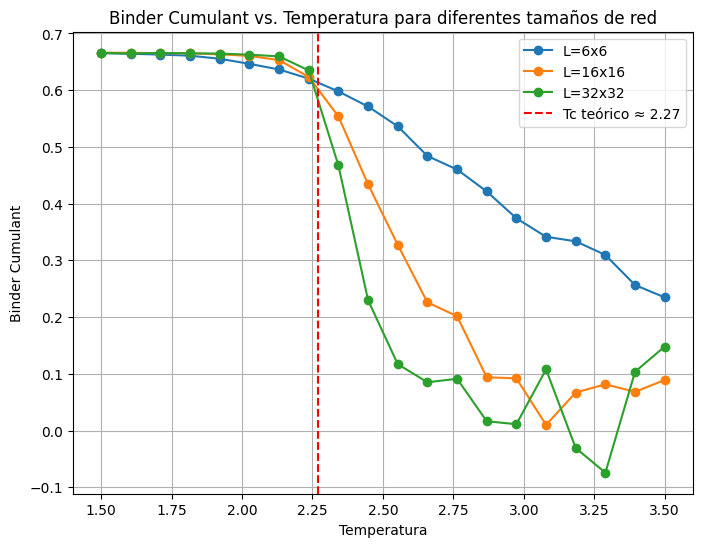

De nuevo notamos que el binder cumulant se intersecta cerca de la temperatura crítica.